Kelompok 8:
- Tresya Meisel Adieputri (00000073937)
- Jesse Laurencia (00000072698)
- Kelvin Harianto (00000072811)
- Naufal Risqiansyah (00000072264)

## Bagian 1: Definisi Game Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

class CatchFruitEnv:
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.reset()
    
    def reset(self):
        self.fruit_position = [0, np.random.randint(0, self.grid_size)]
        self.basket_position = [self.grid_size-1, self.grid_size//2]
        self.done = False
        return self._get_state()
    
    def _get_state(self):
        return (self.fruit_position[0], self.fruit_position[1], self.basket_position[1])
    
    def step(self, action):
        if action == 0: # Move left
            self.basket_position[1] = max(0, self.basket_position[1] - 1)
        elif action == 1: # Move right
            self.basket_position[1] = min(self.grid_size - 1, self.basket_position[1] + 1)
        
        # Move fruit down
        self.fruit_position[0] += 1
        
        # Check if fruit is caught
        reward = 0
        if self.fruit_position[0] == self.grid_size:
            if self.fruit_position[1] == self.basket_position[1]:
                reward = 5 # Fruit caught
            else:
                reward = -1 # Fruit missed
            self.done = True
        else:
            self.done = False
        
        return self._get_state(), reward, self.done
    
    def render(self):
        clear_output(wait=True)
        state = np.zeros((self.grid_size, self.grid_size))
        if self.fruit_position[0] < self.grid_size:
            state[self.fruit_position[0], self.fruit_position[1]] = 1
        state[self.basket_position[0], self.basket_position[1]] = 2
        plt.imshow(state, cmap='gray')
        plt.show()

__init__(self, grid_size=10): Menginisialisasi lingkungan permainan dengan ukuran grid 10x10.

reset(self): Mengatur ulang permainan, mengatur posisi awal buah dan keranjang, dan mengembalikan status awal.

_get_state(self): Mengembalikan posisi buah dan keranjang saat ini.

step(self, action): Memproses tindakan pemain (gerak kiri atau kanan), memperbarui posisi buah, dan mengembalikan status terbaru, reward, dan status permainan (selesai atau belum).

render(self): Menampilkan visualisasi dari posisi buah dan keranjang dalam grid.

## Bagian 2: Q-learning Algorithm dan Pelatihan

Parameter:

- num_episodes: Jumlah episode pelatihan.
- max_steps: Jumlah langkah maksimal per episode.
- learning_rate: Laju pembelajaran untuk memperbarui nilai Q.
- discount_rate: Diskon untuk nilai reward masa depan.
- epsilon: Parameter eksplorasi untuk memilih tindakan secara acak.
- epsilon_min: Nilai minimum epsilon untuk eksplorasi.
- epsilon_decay: Faktor pengurangan epsilon setiap episode.
- action_size: Jumlah tindakan yang tersedia (kiri atau kanan).

In [2]:
# Parameters
num_episodes = 20
max_steps = 10
learning_rate = 0.40
discount_rate = 0.80
epsilon = 0.3
epsilon_min = 0.01
epsilon_decay = 0.995
action_size = 2

# Initialize environment
env = CatchFruitEnv()

# Initialize Q-table
state_size = (env.grid_size, env.grid_size, env.grid_size)
q_table = np.zeros(state_size + (action_size,))

# Lists to store results
initial_states = []
final_states = []
episode_rewards = []

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    initial_state = state
    
    # Print episode information
    print(f"Episode {episode + 1}/{num_episodes}:")
    print(f"Initial State: {initial_state}")
    
    for step in range(max_steps):
        # Choose action
        if np.random.rand() <= epsilon:
            action = np.random.randint(0, action_size)
        else:
            action = np.argmax(q_table[state])
        
        # Take action
        next_state, reward, done = env.step(action)
        
        # Update Q-value
        q_value = q_table[state + (action,)]
        next_state = (
            min(next_state[0], env.grid_size - 1),
            min(next_state[1], env.grid_size - 1),
            min(next_state[2], env.grid_size - 1)
        )
        best_next_q = np.max(q_table[next_state])
        q_table[state + (action,)] = q_value + learning_rate * (reward + discount_rate * best_next_q - q_value)
        
        # Update total reward and state
        total_reward += reward
        state = next_state
        
        # Print step information
        print(f"Step {step + 1}: Action: {action}, Reward: {reward}, Next State: {next_state}, Total Reward: {total_reward}")
        
        if done:
            break
    
    # Store episode results
    episode_rewards.append(total_reward)
    initial_states.append(initial_state)
    final_states.append(state)
    
    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

Episode 1/20:
Initial State: (0, 5, 5)
Step 1: Action: 0, Reward: 0, Next State: (1, 5, 4), Total Reward: 0
Step 2: Action: 1, Reward: 0, Next State: (2, 5, 5), Total Reward: 0
Step 3: Action: 0, Reward: 0, Next State: (3, 5, 4), Total Reward: 0
Step 4: Action: 0, Reward: 0, Next State: (4, 5, 3), Total Reward: 0
Step 5: Action: 1, Reward: 0, Next State: (5, 5, 4), Total Reward: 0
Step 6: Action: 0, Reward: 0, Next State: (6, 5, 3), Total Reward: 0
Step 7: Action: 0, Reward: 0, Next State: (7, 5, 2), Total Reward: 0
Step 8: Action: 0, Reward: 0, Next State: (8, 5, 1), Total Reward: 0
Step 9: Action: 0, Reward: 0, Next State: (9, 5, 0), Total Reward: 0
Step 10: Action: 0, Reward: -1, Next State: (9, 5, 0), Total Reward: -1
Episode 2/20:
Initial State: (0, 5, 5)
Step 1: Action: 0, Reward: 0, Next State: (1, 5, 4), Total Reward: 0
Step 2: Action: 0, Reward: 0, Next State: (2, 5, 3), Total Reward: 0
Step 3: Action: 1, Reward: 0, Next State: (3, 5, 4), Total Reward: 0
Step 4: Action: 0, Rew

## Bagian 3: Menyimpan Hasil Pelatihan


In [3]:
# Save results to a file (e.g., using pickle)
import pickle

results = {
    'initial_states': initial_states,
    'final_states': final_states,
    'episode_rewards': episode_rewards,
    'q_table': q_table
}

with open('q_learning_results.pkl', 'wb') as f:
    pickle.dump(results, f)

## Bagian 4: Memuat Hasil dan Menampilkan Visualisasi


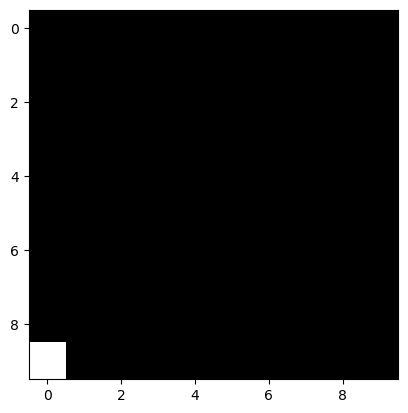

Step 10: Action: 0, Reward: -1, Next State: (10, 8, 0)
Final State: (10, 8, 0)


In [4]:
# Load results from file
with open('q_learning_results.pkl', 'rb') as f:
    results = pickle.load(f)

initial_states = results['initial_states']
final_states = results['final_states']
episode_rewards = results['episode_rewards']
q_table = results['q_table']

# Function to visualize a specific episode
import time

def visualize_episode(episode_index):#, delay=1.0):
    env = CatchFruitEnv()
    state = initial_states[episode_index]
    env.fruit_position = [state[0], state[1]]
    env.basket_position = [env.grid_size-1, state[2]]
    env.render()
    print(f"Initial State: {state}")
    
    for step in range(max_steps):
     #   time.sleep(delay)  # Add delay for better visualization
        clear_output(wait=True)
        action = np.argmax(q_table[state])
        next_state, reward, done = env.step(action)
        env.render()
        print(f"Step {step + 1}: Action: {action}, Reward: {reward}, Next State: {next_state}")
        state = next_state
        if done:
            break
    print(f"Final State: {state}")

# Visualize each episode
for i in range(len(initial_states)):
    visualize_episode(i)

## Bagian 5: Menampilkan Grid Value

In [5]:
def visualize_q_table(q_table, grid_size):
    for i in range(grid_size):
        for j in range(grid_size):
            for k in range(grid_size):
                state = (i, j, k)
                q_values = q_table[state]
                print(f"State {state}: Left: {q_values[0]:.2f}, Right: {q_values[1]:.2f}")

# Call this function to print the Q-table values
visualize_q_table(q_table, env.grid_size)

State (0, 0, 0): Left: 0.00, Right: 0.00
State (0, 0, 1): Left: 0.00, Right: 0.00
State (0, 0, 2): Left: 0.00, Right: 0.00
State (0, 0, 3): Left: 0.00, Right: 0.00
State (0, 0, 4): Left: 0.00, Right: 0.00
State (0, 0, 5): Left: 0.00, Right: 0.00
State (0, 0, 6): Left: 0.00, Right: 0.00
State (0, 0, 7): Left: 0.00, Right: 0.00
State (0, 0, 8): Left: 0.00, Right: 0.00
State (0, 0, 9): Left: 0.00, Right: 0.00
State (0, 1, 0): Left: 0.00, Right: 0.00
State (0, 1, 1): Left: 0.00, Right: 0.00
State (0, 1, 2): Left: 0.00, Right: 0.00
State (0, 1, 3): Left: 0.00, Right: 0.00
State (0, 1, 4): Left: 0.00, Right: 0.00
State (0, 1, 5): Left: 0.00, Right: 0.00
State (0, 1, 6): Left: 0.00, Right: 0.00
State (0, 1, 7): Left: 0.00, Right: 0.00
State (0, 1, 8): Left: 0.00, Right: 0.00
State (0, 1, 9): Left: 0.00, Right: 0.00
State (0, 2, 0): Left: 0.00, Right: 0.00
State (0, 2, 1): Left: 0.00, Right: 0.00
State (0, 2, 2): Left: 0.00, Right: 0.00
State (0, 2, 3): Left: 0.00, Right: 0.00
State (0, 2, 4):

Parameter:
- q_table: Q-table yang telah dilatih.
- grid_size: Ukuran grid dari lingkungan permainan.

Loop:
- Loop tiga tingkat (i, j, k) untuk mengakses setiap state dalam grid.

State dan Q-values:
- Untuk setiap state (i, j, k), nilai Q untuk tindakan "Left" dan "Right" diambil dari Q-table.
- Nilai Q ditampilkan dengan format dua desimal untuk setiap state.

## Bagian 6: Evaluasi Model

In [6]:
# Function to evaluate the performance of the trained model
def evaluate_model(env, q_table, num_episodes=100):
    total_rewards = []
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        for step in range(max_steps):
            action = np.argmax(q_table[state])
            next_state, reward, done = env.step(action)
            total_reward += reward
            state = next_state
            if done:
                break
        total_rewards.append(total_reward)
    
    avg_reward = np.mean(total_rewards)
    success_rate = sum(1 for reward in total_rewards if reward > 0) / num_episodes
    print(f"Average Reward: {avg_reward}")
    print(f"Success Rate: {success_rate * 100:.2f}%")
    return avg_reward, success_rate

# Evaluate the model
avg_reward, success_rate = evaluate_model(env, q_table)

Average Reward: 0.14
Success Rate: 19.00%


Kesimpulan:

- Q-learning dapat diterapkan untuk mengontrol agen dalam permainan CatchFruit.
- Model menunjukkan kemampuan untuk belajar menangkap buah meskipun hasil reward rata-rata negatif.

---

---